In [1]:
import numpy as np
import seaborn as sns
import re
import string
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/tarunnair/Downloads/train_tweets.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
df.shape

(31962, 3)

In [5]:
# Remove @userID from the tweets for better data transformation

In [6]:
def remove_pattern(input_text, pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i, "", input_txt)
    return input_txt

In [7]:
df['clean_tweet'] = df['tweet'].str.replace('@[\w]+', '')

In [8]:
df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


# Removing unecessary punctuations and words

In [9]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z\s]", "")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


# Individual words into token

In [10]:
tokenized_tweet= df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, lyft, credit, i, cant, use, caus...
2                              [bihday, your, majesty]
3    [model, i, love, u, take, with, u, all, the, t...
4               [factsguide, society, now, motivation]
Name: clean_tweet, dtype: object

In [11]:
# Separating individual workds

from nltk.stem.porter import PorterStemmer


In [12]:
Stemmer=PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [Stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, lyft, credit, i, cant, use, caus,...
2                              [bihday, your, majesti]
3    [model, i, love, u, take, with, u, all, the, t...
4                     [factsguid, societi, now, motiv]
Name: clean_tweet, dtype: object

In [13]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['clean_tweet'] = tokenized_tweet
df. head ()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for lyft credit i cant use caus they don...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguid societi now motiv


# EDA

In [14]:
!pip install wordcloud

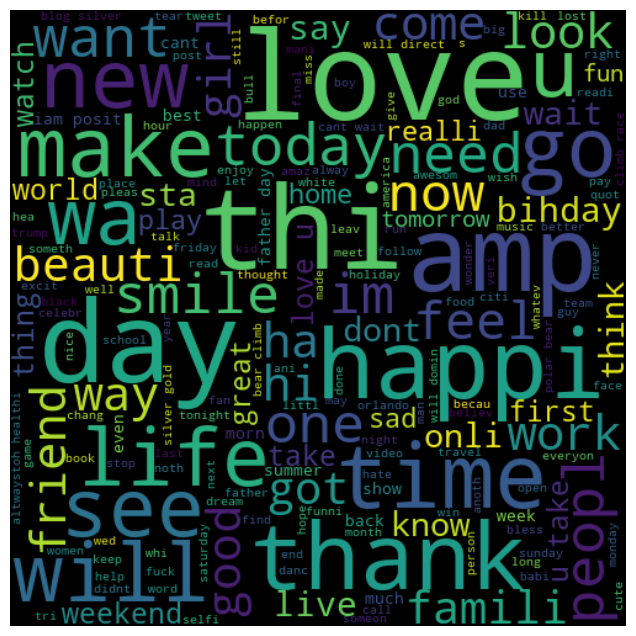

In [15]:
#Visualize frequent words

all_words="".join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud
wordcloud= WordCloud(width=500, height=500, random_state=42, max_font_size= 100).generate(all_words)
    
#Plotting the Graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

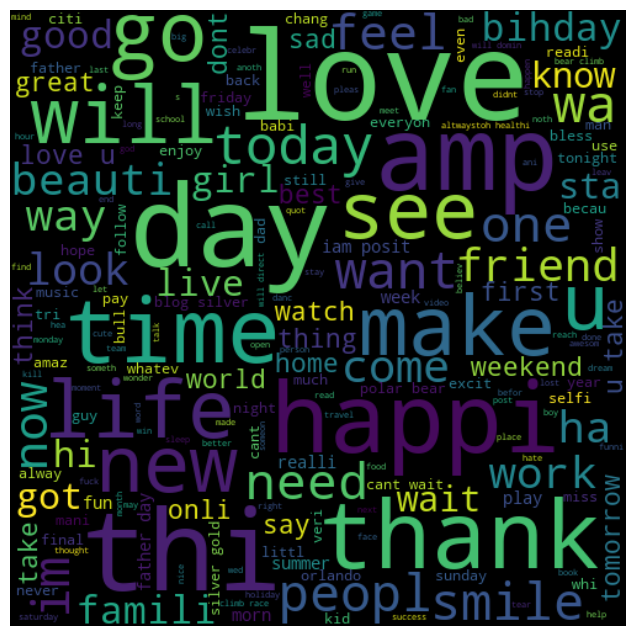

In [16]:
#Visualize frequent +ve words

all_words="".join([sentence for sentence in df['clean_tweet'][df['label']==0]])
from wordcloud import WordCloud
wordcloud= WordCloud(width=500, height=500, random_state=42, max_font_size= 100).generate(all_words)
    
#Plotting the Graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

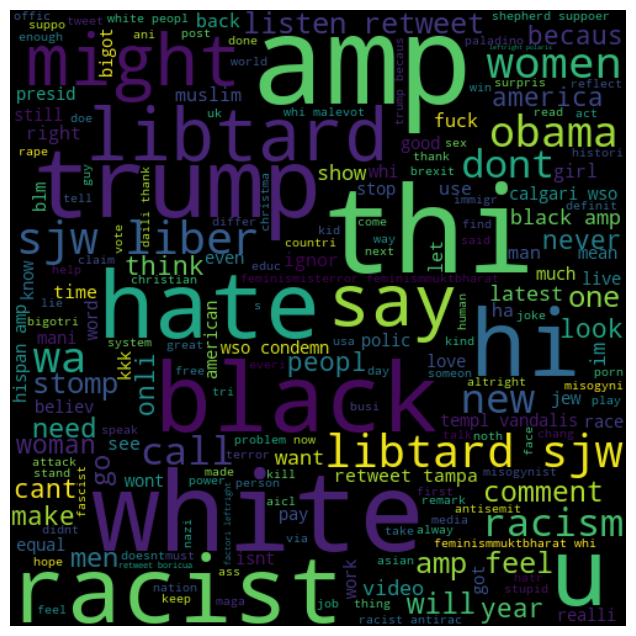

In [17]:
#Visualize frequent -ve words

all_words="".join([sentence for sentence in df['clean_tweet'][df['label']==1]])
from wordcloud import WordCloud
wordcloud= WordCloud(width=500, height=500, random_state=42, max_font_size= 100).generate(all_words)
    
#Plotting the Graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
def hashtag_extract(tweets):
    hashtags = []
    # Loop through tweets
    for tweet in tweets:
        # Changed the regex pattern to extract just the word after #
        ht = re.findall(r"#\w+", tweet)  # Note: \w+ instead of (\w+)
        hashtags.append(ht)
    return hashtags

# Extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label'] == 0])

# Extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label'] == 1])

In [19]:
# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
bow_vectorizer = CountVectorizer(
    max_df=0.90, 
    min_df=2, 
    max_features=1000, 
    stop_words='english'
)

# Fit and transform the text data - fixed the column name syntax
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

# If you want to see the first document's features as an array
# bow[0].toarray()

# Train-test split
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    bow,                    # Feature matrix
    df['label'],           # Target variable
    random_state=42,       # For reproducibility
    test_size=0.25         # 25% test size
)

# Model Training

In [20]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on test set
pred = model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, pred)
print(f"F1 Score: {f1:.4f}")

# Optional: Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.4f}")

F1 Score: 0.4911
Accuracy: 0.9466


In [21]:
# Use probability to get output
# Get probability predictions
pred_prob = model.predict_proba(X_test)

# Create predictions using 0.3 threshold
pred = (pred_prob[:, 1] >= 0.3)

# Convert boolean to integer predictions
pred = pred.astype(np.int64)

# Calculate metrics
f1 = f1_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)

print(f"F1 Score: {f1:.4f}")  # Should output around 0.5546
print(f"Accuracy: {accuracy:.4f}")  # Should output around 0.9433

# Check prediction for first sample
print(f"First sample prediction (threshold 0.3): {pred_prob[0][1] >= 0.3}")

F1 Score: 0.5656
Accuracy: 0.9441
First sample prediction (threshold 0.3): False
